#                                             EDA & Data Cleaning

# Content Table

-   Loading Data
-   General Data Exploration
-   Data Visualization

# Loading Data

In [1]:
# imports
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from functools import reduce

In [2]:
# reading csv files
training_data = pd.read_csv('ml_case_training_data.csv')
history_data = pd.read_csv('ml_case_training_hist_data.csv')
output_data = pd.read_csv('ml_case_training_output.csv')

In [3]:
# creating one final dataframe
dfs= [training_data, history_data, output_data]
df = reduce(lambda left,right: pd.merge(left,right,on='id'), dfs)

In [4]:
df.head()

,id,activity_new,campaign_disc_ele,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_first_activ,...,origin_up,pow_max,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix,churn
0,48ada52261e7cf58715202705a0451c9,esoiiifxdlbkcsluxmfuacbdckommixw,NaN,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,2012-11-07,2016-11-06,NaN,...,ldkssxwpmemidmecebumciepifcamkci,180.0,2015-01-01,0.106043,0.093474,0.067378,58.936774,36.344726,8.33426,0
1,48ada52261e7cf58715202705a0451c9,esoiiifxdlbkcsluxmfuacbdckommixw,NaN,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,2012-11-07,2016-11-06,NaN,...,ldkssxwpmemidmecebumciepifcamkci,180.0,2015-02-01,0.106043,0.093474,0.067378,58.936774,36.344726,8.33426,0
2,48ada52261e7cf58715202705a0451c9,esoiiifxdlbkcsluxmfuacbdckommixw,NaN,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,2012-11-07,2016-11-06,NaN,...,ldkssxwpmemidmecebumciepifcamkci,180.0,2015-03-01,0.106043,0.093474,0.067378,58.936774,36.344726,8.33426,0
3,48ada52261e7cf58715202705a0451c9,esoiiifxdlbkcsluxmfuacbdckommixw,NaN,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,2012-11-07,2016-11-06,NaN,...,ldkssxwpmemidmecebumciepifcamkci,180.0,2015-04-01,0.106043,0.093474,0.067378,58.936774,36.344726,8.33426,0
4,48ada52261e7cf58715202705a0451c9,esoiiifxdlbkcsluxmfuacbdckommixw,NaN,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,2012-11-07,2016-11-06,NaN,...,ldkssxwpmemidmecebumciepifcamkci,180.0,2015-05-01,0.106043,0.093474,0.067378,58.936774,36.344726,8.33426,0


# General Data Exploration

In [5]:
df.describe()

,campaign_disc_ele,cons_12m,cons_gas_12m,cons_last_month,forecast_base_bill_ele,forecast_base_bill_year,forecast_bill_12m,forecast_cons,forecast_cons_12m,forecast_cons_year,...,net_margin,num_years_antig,pow_max,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix,churn
count,0.0,1.930020e+05,1.930020e+05,1.930020e+05,42042.000000,42042.000000,42042.000000,42042.000000,193002.000000,193002.000000,...,192822.000000,193002.000000,192966.000000,191643.000000,191643.000000,191643.000000,191643.000000,191643.000000,191643.000000,193002.000000
mean,NaN,1.948834e+05,3.190718e+04,1.947086e+04,335.807483,335.807483,3835.596518,206.800605,2370.273676,1907.652807,...,217.965424,5.031134,20.603921,0.140991,0.054412,0.030712,43.325546,10.698201,6.455436,0.099009
std,NaN,6.796728e+05,1.775814e+05,8.238021e+04,649.570278,649.570278,5425.871446,455.720989,4035.719124,5258.824261,...,366.815548,1.676171,21.775187,0.025117,0.050033,0.036335,5.437952,12.856046,7.782279,0.298675
min,NaN,-1.252760e+05,-3.037000e+03,-9.138600e+04,-364.940000,-364.940000,-2503.480000,0.000000,-16689.260000,-85627.000000,...,-4148.990000,1.000000,1.000000,0.000000,0.000000,0.000000,-0.177779,-0.097752,-0.065172,0.000000
25%,NaN,5.908000e+03,0.000000e+00,0.000000e+00,0.000000,0.000000,1158.160000,0.000000,513.250000,0.000000,...,51.970000,4.000000,12.500000,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000,0.000000
50%,NaN,1.533200e+04,0.000000e+00,9.010000e+02,162.890000,162.890000,2186.610000,42.190000,1178.980000,378.000000,...,119.670000,5.000000,13.856000,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000,0.000000
75%,NaN,5.022000e+04,0.000000e+00,4.127000e+03,396.180000,396.180000,4245.810000,228.100000,2691.580000,1994.000000,...,275.750000,6.000000,19.800000,0.151635,0.101780,0.072558,44.444710,24.339581,16.226389,0.000000
max,NaN,1.609711e+07,4.188440e+06,4.538720e+06,12566.080000,12566.080000,81122.630000,9682.890000,103801.930000,175375.000000,...,24570.650000,16.000000,500.000000,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221,1.000000


In [6]:
pd.DataFrame({"Data Types" : df.dtypes})

,Data Types
id,object
activity_new,object
campaign_disc_ele,float64
channel_sales,object
cons_12m,int64
cons_gas_12m,int64
cons_last_month,int64
date_activ,object
date_end,object
date_first_activ,object


In [7]:
#drop unnecessary data columns,which includes  > 50 % nulls
df.drop(columns=["campaign_disc_ele","date_first_activ","forecast_base_bill_ele",
                    "forecast_base_bill_year","forecast_bill_12m","forecast_cons" ,"activity_new"],inplace=True)

# Data Visualization 

### Churn Rate

Plotting the churn rate

In [8]:
churn = df[['id','churn']]

In [9]:
def plot_stacked_bars (dataframe, title_, size_=(18, 10), rot_=0, legend_="upper right"):
    # Plot stacked bars with annotations
    ax = dataframe.plot(kind="bar",
    stacked=True,
    figsize=size_,
    rot=rot_,
    title=title_)
    # Annotate bars
    annotate_stacked_bars (ax, textsize=14)
    # Rename legend
    plt.legend([ "Retention", "Churn"], loc=legend_)
    # Labels
    plt.ylabel("Company base (%)")
    plt.show()
            
            
def annotate_stacked_bars(ax, pad=0.99, colour="white", textsize=13):
    
    # Add value annotations to the bars
    # Iterate over the plotted rectanges/bars
    for p in ax. patches:
        # Calculate annotation
        value = str(round(p.get_height(),1))
        # If value is 0 do not annotate
        if value == '0.0':
            continue
        ax.annotate(value,
            ((p.get_x( ) + p.get_width()/2) *pad-0.05, (p.get_y()+p.get_height()/2)*pad),
            color=colour,
            size=textsize,
            )


In [10]:
churn

,id,churn
0,48ada52261e7cf58715202705a0451c9,0
1,48ada52261e7cf58715202705a0451c9,0
2,48ada52261e7cf58715202705a0451c9,0
3,48ada52261e7cf58715202705a0451c9,0
4,48ada52261e7cf58715202705a0451c9,0
...,...,...
192997,563dde550fd624d7352f3de77c0cdfcd,0
192998,563dde550fd624d7352f3de77c0cdfcd,0
192999,563dde550fd624d7352f3de77c0cdfcd,0
193000,563dde550fd624d7352f3de77c0cdfcd,0


In [11]:
churn_total=churn.groupby(churn["churn"]).count()
churn_percentage=churn_total/churn_total.sum()*100
churn_percentage

,id
churn,
0,90.099066
1,9.900934


In [12]:
df.channel_sales.value_counts()

foosdfpfkusacimwkcsosbicdxkicaua    88430
lmkebamcaaclubfxadlmueccxoimlema    24861
usilxuppasemubllopkaafesmlibmsdf    17314
ewpakwlliwisiwduibdlfmalxowmwpci    11587
sddiedcslfslkckwlfkdpoeeailfpeds      143
epumfxlbckeskwekxbiuasklxalciiuu       48
fixdbufsefwooaasfcxdxadsiekoceaa       24
Name: channel_sales, dtype: int64

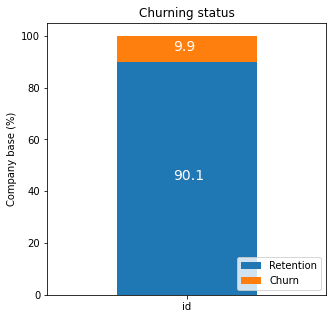

In [13]:
plot_stacked_bars(churn_percentage.transpose(),"Churning status", (5,5),legend_="lower right")

### Sales channel
    The sales channel seems to be an important feature when predecting the churning of a user. 
    It is not the same if the sales were through email or telephone.

In [14]:
channel=df[["id","channel_sales","churn"]]

channel=channel.groupby([channel["channel_sales"],channel["churn"]])["id"].count().unstack(level=1).fillna(0)
channel

churn,0,1
channel_sales,,
epumfxlbckeskwekxbiuasklxalciiuu,48.0,0.0
ewpakwlliwisiwduibdlfmalxowmwpci,10604.0,983.0
fixdbufsefwooaasfcxdxadsiekoceaa,24.0,0.0
foosdfpfkusacimwkcsosbicdxkicaua,77389.0,11041.0
lmkebamcaaclubfxadlmueccxoimlema,23471.0,1390.0
sddiedcslfslkckwlfkdpoeeailfpeds,143.0,0.0
usilxuppasemubllopkaafesmlibmsdf,15516.0,1798.0


In [15]:
channel_churn=(channel.div(channel.sum(axis=1),axis=0)*100).sort_values(by=[1],ascending=False)

In [16]:
channel_churn

churn,0,1
channel_sales,,
foosdfpfkusacimwkcsosbicdxkicaua,87.514418,12.485582
usilxuppasemubllopkaafesmlibmsdf,89.615340,10.384660
ewpakwlliwisiwduibdlfmalxowmwpci,91.516355,8.483645
lmkebamcaaclubfxadlmueccxoimlema,94.408914,5.591086
epumfxlbckeskwekxbiuasklxalciiuu,100.000000,0.000000
fixdbufsefwooaasfcxdxadsiekoceaa,100.000000,0.000000
sddiedcslfslkckwlfkdpoeeailfpeds,100.000000,0.000000


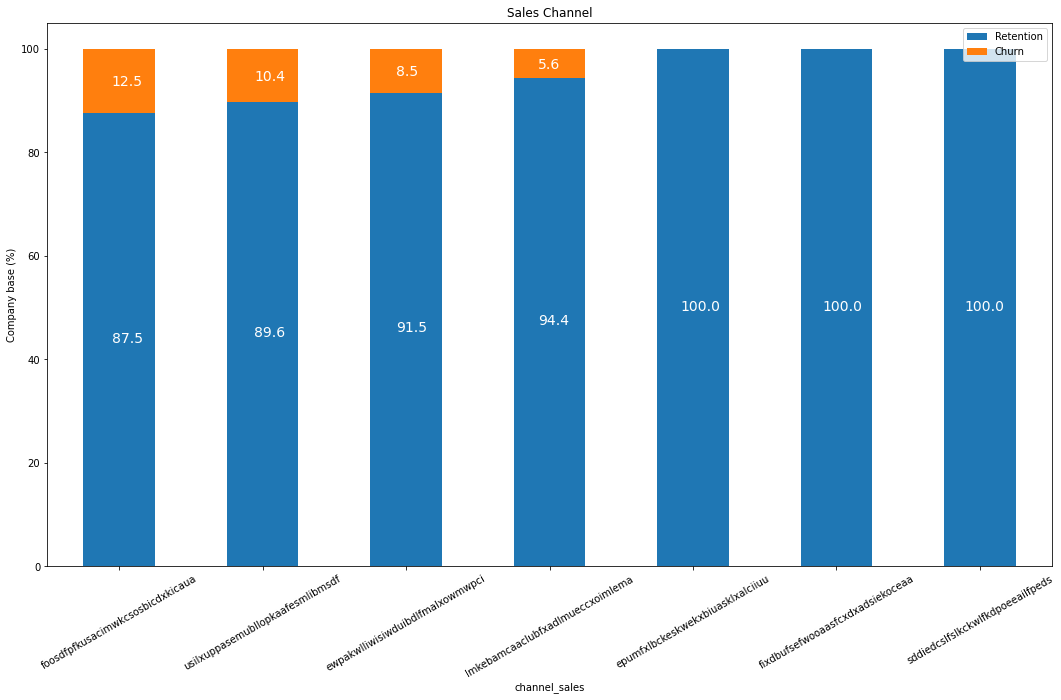

In [17]:
plot_stacked_bars(channel_churn,"Sales Channel",rot_=30)

### Consumption
Let's see the distribution of the consumption over the last year and last month

In [18]:
consumption=df[["id","cons_12m","cons_gas_12m","cons_last_month","imp_cons","has_gas","churn"]]

In [19]:
def plot_distribution(dataframe,column,ax,bins_=50):
    """
    Plot variable distirbution in a stacked histogram of churned or retained company
    """
    # Create a temporal dataframe with the data to be plot
    temp=pd.DataFrame({"Retention":dataframe[dataframe["churn"]==0][column],
                       "Churn":dataframe[dataframe["churn"]==1][column]})
    # Plot the histogram
    temp[["Retention","Churn"]].plot(kind='hist',bins=bins_,ax=ax,stacked=True)

    # X-axis label
    ax.set_xlabel(column)
    
    # Change the x-axis to plain style
    ax.ticklabel_format(style='plain',axis='x')

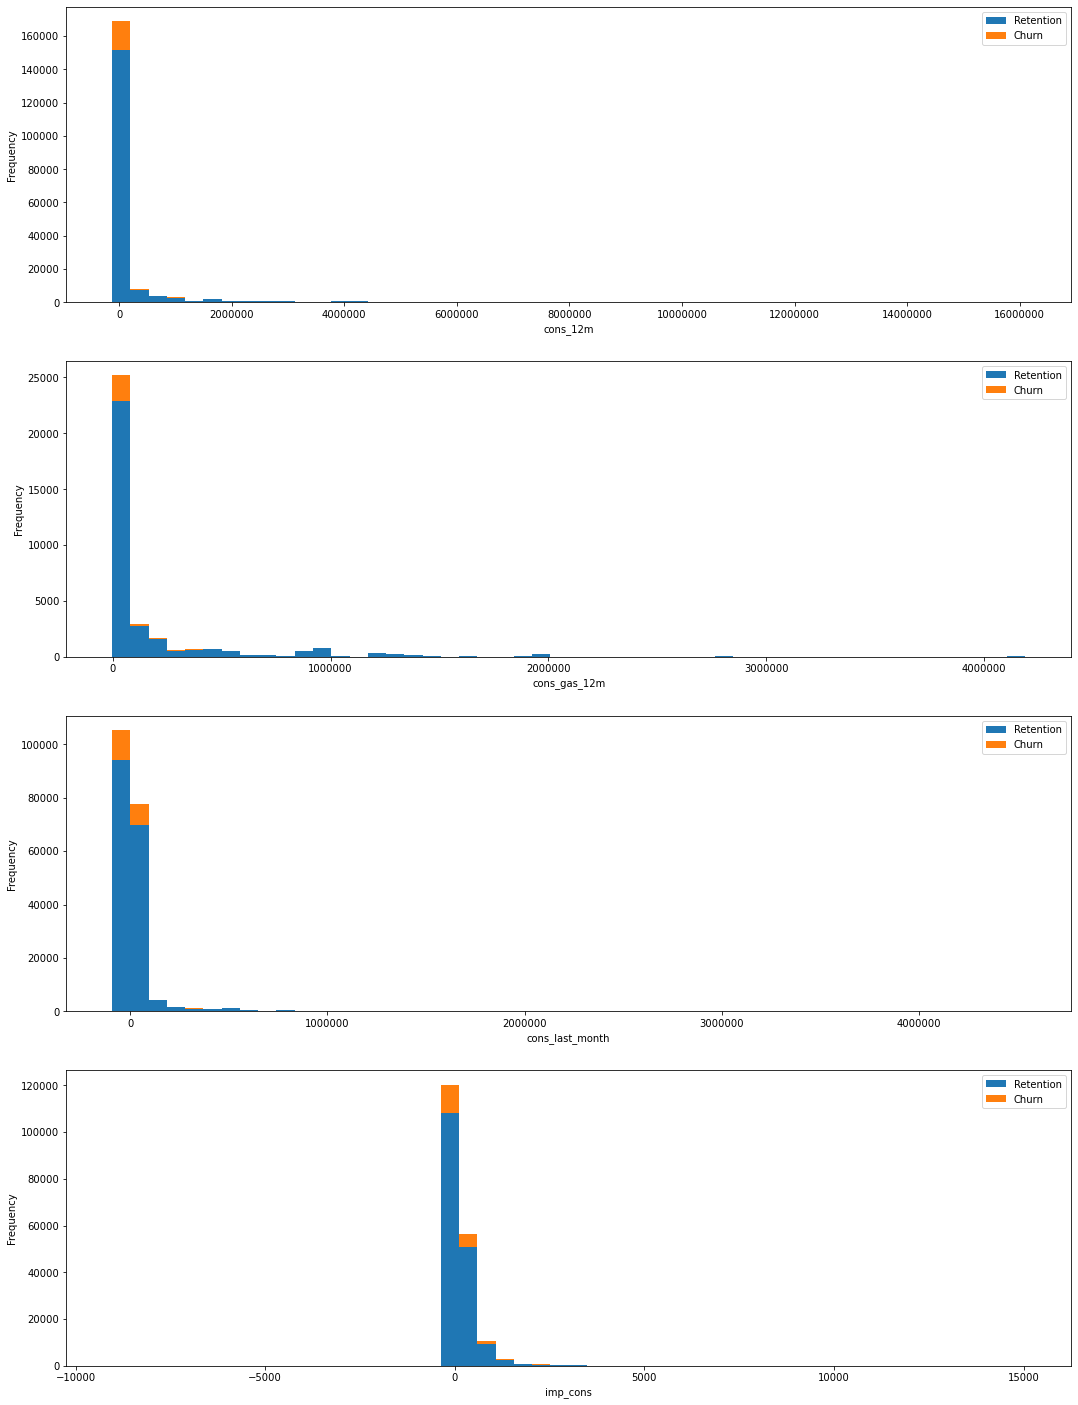

In [20]:
fig,axs=plt.subplots(nrows=4,figsize=(18,25))
# Plot histogram
plot_distribution(consumption,"cons_12m",axs[0])
# Note that the gas consumption must have gas contract
plot_distribution(consumption[consumption["has_gas"]=="t"],"cons_gas_12m",axs[1])
plot_distribution(consumption,"cons_last_month",axs[2])
plot_distribution(consumption,"imp_cons",axs[3])

We can clearly see in here that the consumption data is highly
skewed to the right
, presenting a very long right-tail towards the higher values of thedistribution.

  The values on the higher end and lower ends of the distribution are likely to be outliers. We can use a standard plot to visualise the outliers in moredetail. 
  
  A boxplot is a standardized way of displaying the distribution of data based on a five number summary (“minimum”, first quartile (Q1), median,third quartile (Q3), and “maximum”). 
  
  It can tell us about our outliers and what their values are. It can also tell us if our data is symmetrical, how tightlyour data is grouped, and if and how our data is skewed.

C:\Users\islam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\islam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\islam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\islam\anaconda3\lib\si

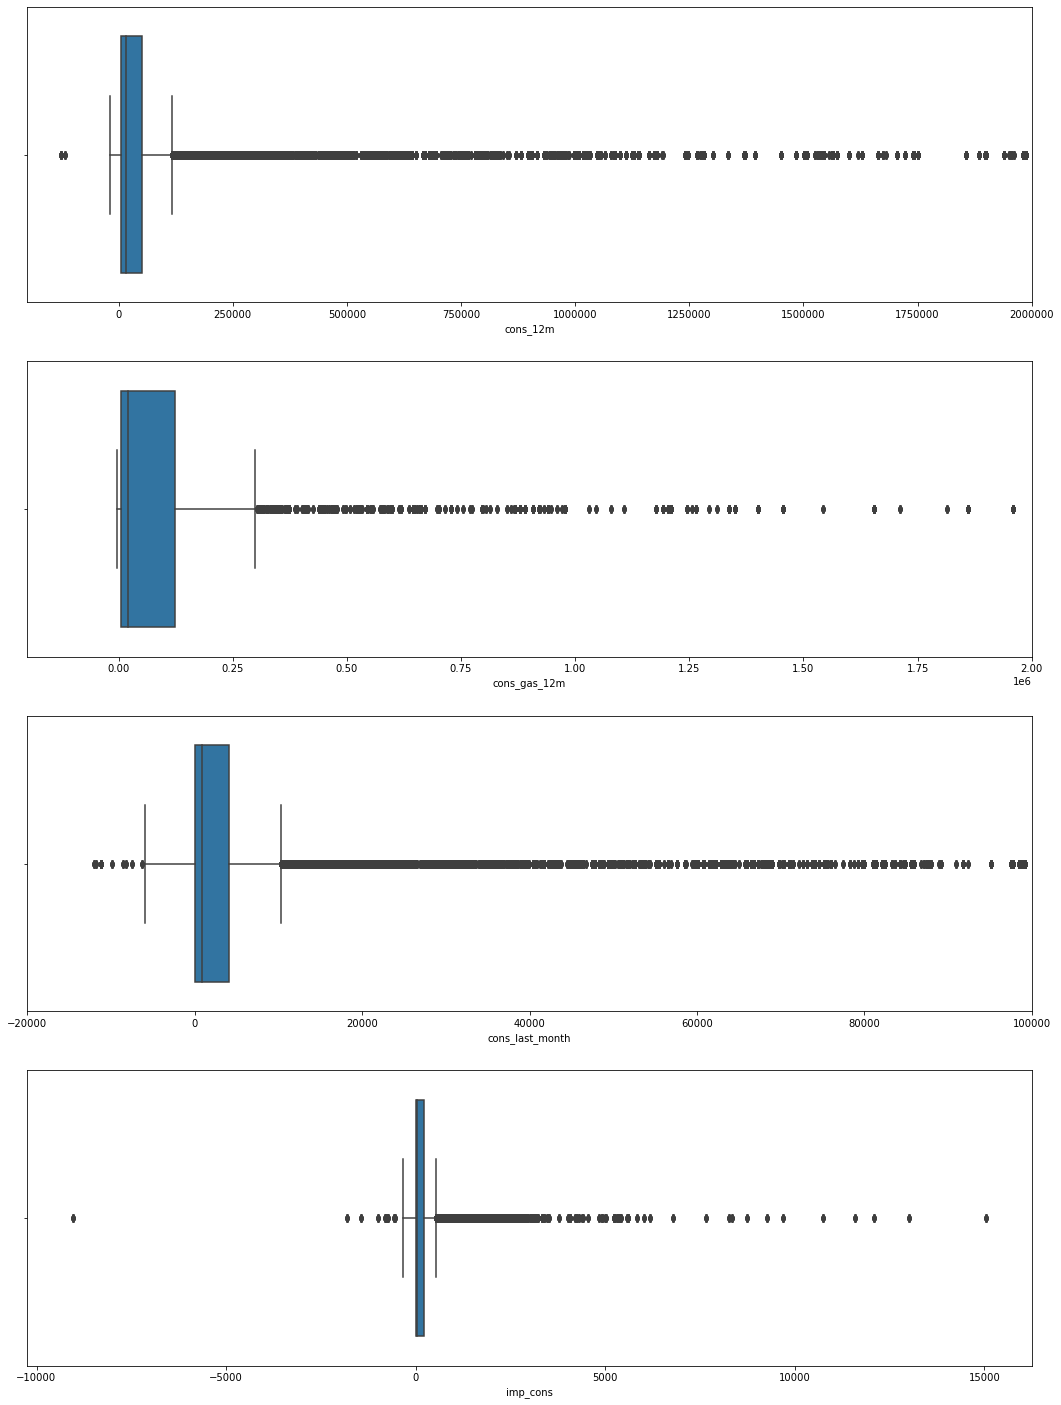

In [21]:
fig,axs=plt.subplots(nrows=4,figsize=(18,25))
# Plot histogram
sns.boxplot(consumption["cons_12m"],ax=axs[0])

sns.boxplot(consumption[consumption["has_gas"]=="t"]["cons_gas_12m"],ax=axs[1])
sns.boxplot(consumption["cons_last_month"],ax=axs[2])
sns.boxplot(consumption["imp_cons"],ax=axs[3])

# Remove scientific notation
for ax in axs:
    ax.ticklabel_format(style='plain',axis='x')
    # Set x-axis limit
    axs[0].set_xlim(-200000,2000000)
    axs[1].set_xlim(-200000,2000000)
    axs[2].set_xlim(-20000,100000)
    plt.show()

It is very clear now that we have a highly skewed distribution, and several outliers.

We will deal with the skewness and outliers in the next exercise (
Data cleaning
)

### Dates

In [22]:
dates = df[["id","date_activ","date_end", "date_modif_prod","date_renewal","churn"]].copy()

In [23]:
# Transform date columns to datetime type
dates["date_activ"] = pd.to_datetime(dates["date_activ"], format='%Y-%m-%d')
dates["date_end"] = pd.to_datetime(dates["date_end"], format='%Y-%m-%d')
dates["date_modif_prod"] = pd.to_datetime(dates["date_modif_prod"], format='%Y-%m-%d')
dates["date_renewal"] = pd.to_datetime(dates["date_renewal"], format='%Y-%m-%d')

In [24]:
def plot_dates(dataframe, column, fontsize_=12):
    """ Plot monthly churn and retention distribution """
    # Group by month
    temp = dataframe[[column,
                      "churn", "id"]].set_index(column).groupby([pd.Grouper(freq='M'), "churn"]).count().unstack(level=1) 
    # Plot
    ax=temp.plot(kind="bar", stacked=True, figsize=(18,10), rot=0) 
    # Change x-axis labels to months
    ax.set_xticklabels(map(lambda x: line_format(x), temp.index)) 
    # Change xlabel size 
    plt.xticks(fontsize=fontsize_) 
    # Rename y-axis
    plt.ylabel("Number of companies") 
    # Rename legend
    plt.legend(["Retention", "Churn"], loc="upper right") 
    plt.show() 
    
def line_format(label):
    """ Convert time label to the format of pandas line plot """
    month = label.month_name()[:1] 
    if label.month_name() == "January": 
        month += f'\n{label.year}'
    return month


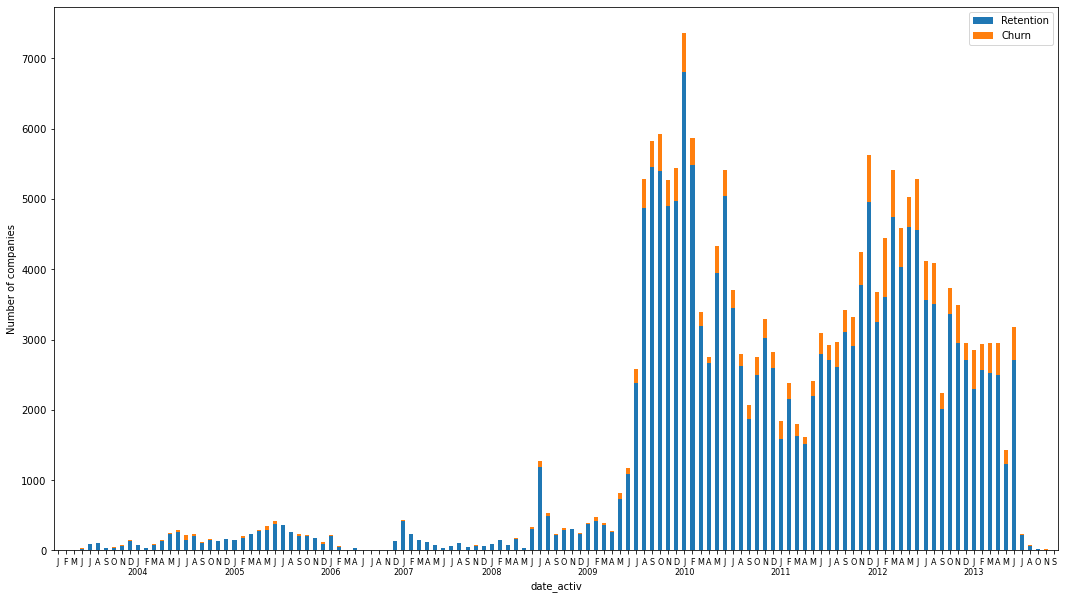

In [25]:
#churn during activation of the contract
plot_dates(dates, "date_activ", fontsize_=8)

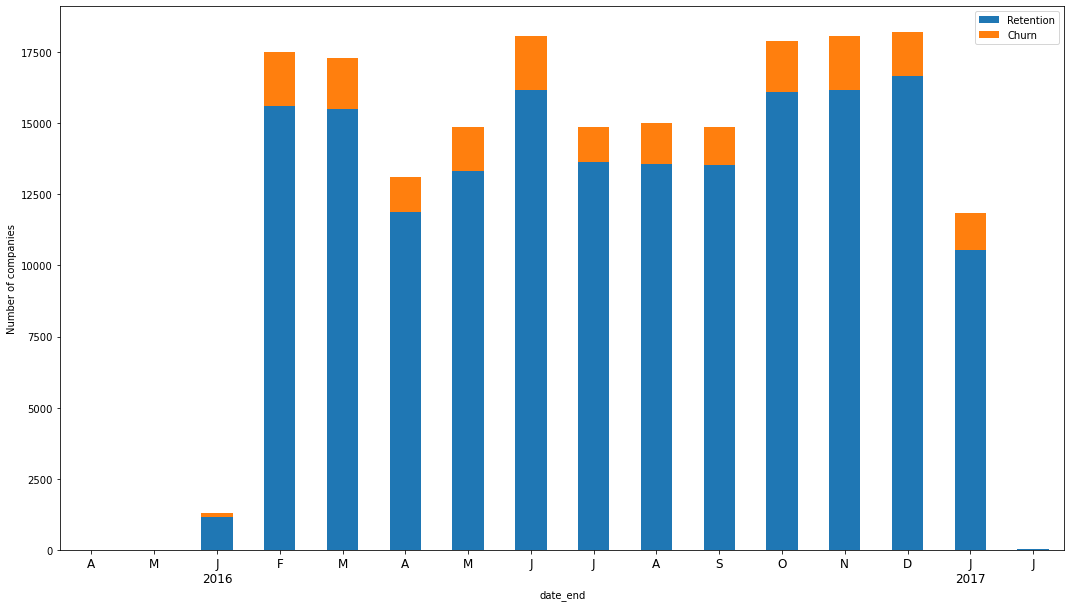

In [26]:
# churn at the end of the contract
plot_dates(dates,"date_end")

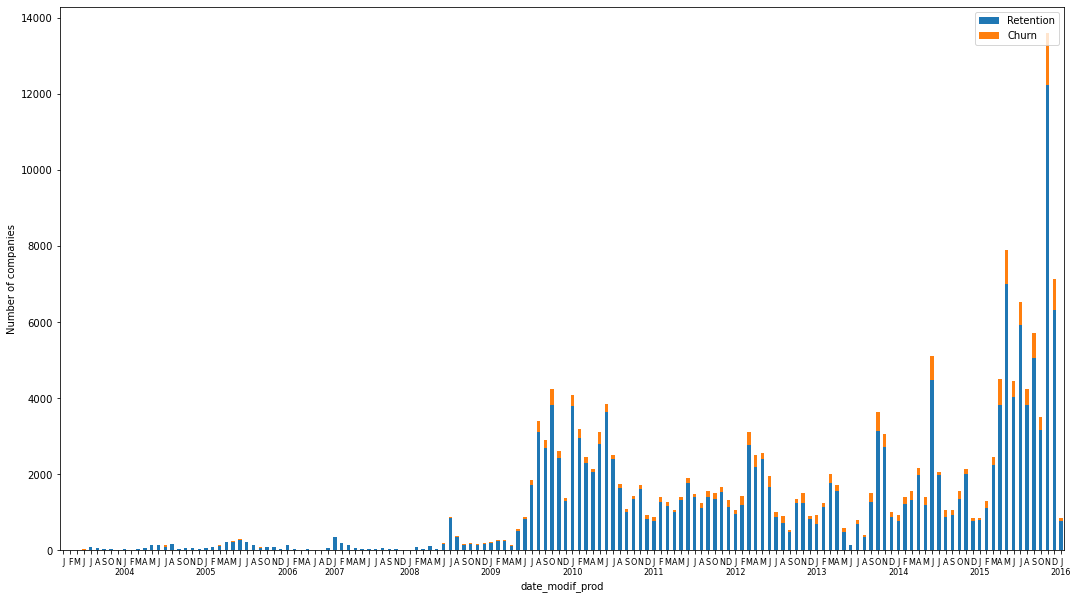

In [27]:
#churn at the last modification of the product
plot_dates(dates, "date_modif_prod", fontsize_=8)

### Contract Type ( Electricity , Gas )

In [28]:
df['has_gas'].value_counts()

f    157466
t     35536
Name: has_gas, dtype: int64

In [29]:
contract_type = df[["id", "has_gas", "churn"]]

In [30]:
contract = contract_type.groupby([contract_type["churn"], contract_type["has_gas"]])["id"].count().unstack(level=0)
contract

churn,0,1
has_gas,,
f,141165,16301
t,32728,2808


In [31]:
contract_percentage = (contract.div(contract.sum(axis=1), axis=0)*100).sort_values(by=[1], ascending=False)

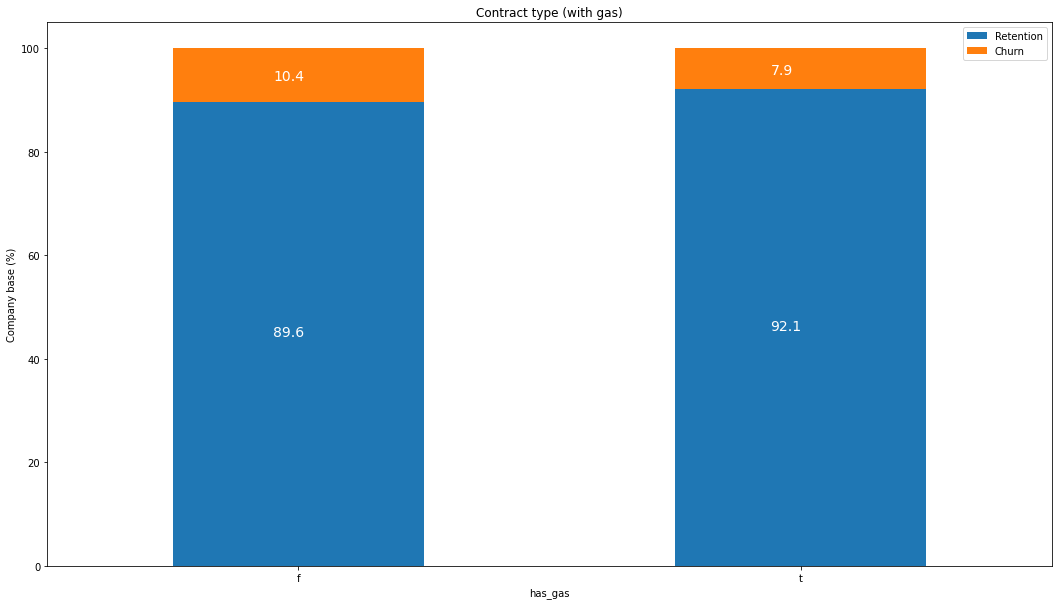

In [32]:
plot_stacked_bars(contract_percentage, "Contract type (with gas)")

### Others 

In [33]:
others = df[["id","nb_prod_act","num_years_antig", "origin_up", "churn"]]

In [34]:
products = others.groupby([others["nb_prod_act"],others["churn"]])["id"].count().unstack(level=1)
products

churn,0,1
nb_prod_act,,
1,135112.0,15499.0
2,29738.0,2722.0
3,6059.0,672.0
4,1856.0,180.0
5,408.0,36.0
6,108.0,NaN
8,96.0,NaN
9,144.0,NaN
10,24.0,NaN


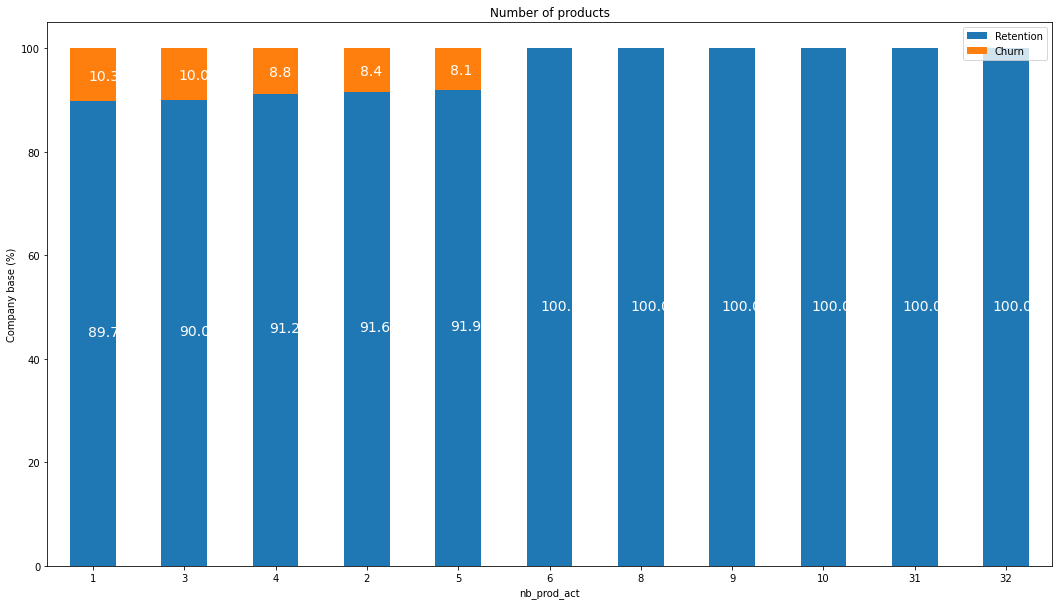

In [35]:
# churn at number of active products and services
products_percentage = (products.div(products.sum(axis=1), axis=0)*100).sort_values(by=[1], ascending=False)
plot_stacked_bars(products_percentage, "Number of products")

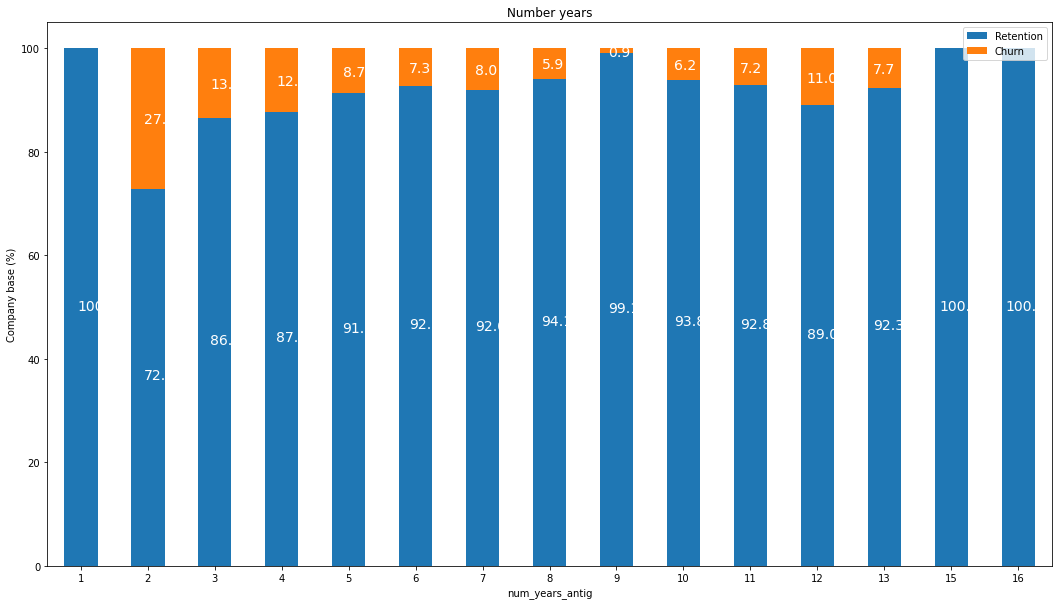

In [36]:
# churn of clients by number of years
years_antig = others.groupby([others["num_years_antig"],others["churn"]])["id"].count().unstack(level=1)
years_antig_percentage = (years_antig.div(years_antig.sum(axis=1), axis=0)*100)
plot_stacked_bars(years_antig_percentage, "Number years")

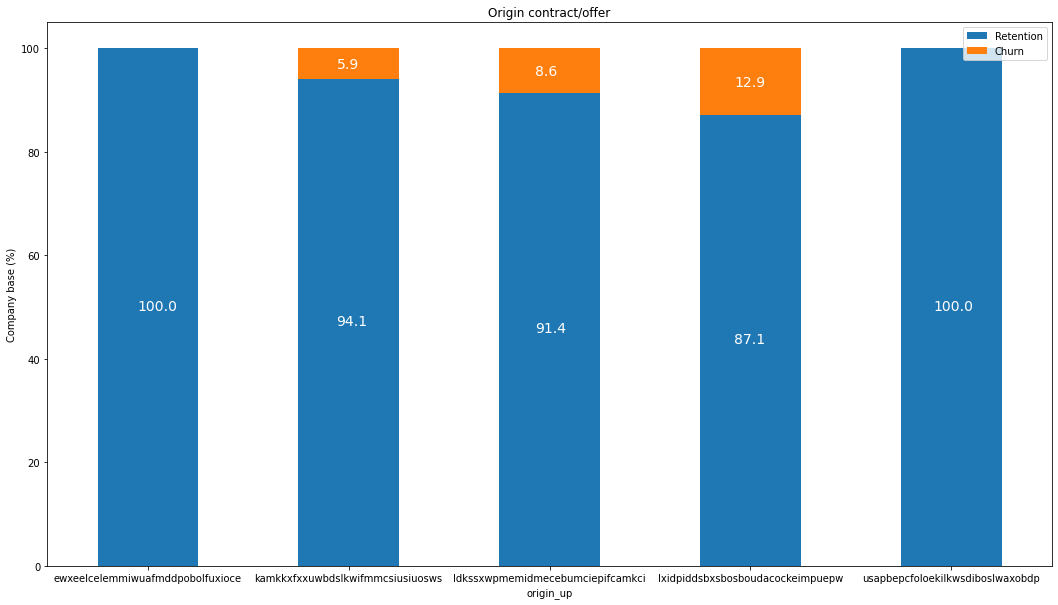

In [37]:
# churn rates of customers by the electricity campaign the customer first subscribed to
origin = others.groupby([others["origin_up"],others["churn"]])["id"].count().unstack(level=1)
origin_percentage = (origin.div(origin.sum(axis=1), axis=0)*100)
plot_stacked_bars(origin_percentage, "Origin contract/offer")

# Data Cleaning

### Missing Values 

In [38]:
# Report the missing percentage of each data column
pd.DataFrame({"Missing values (%)":df.isnull().sum()/len(df.index)*100})

,Missing values (%)
id,0.000000
channel_sales,26.214754
cons_12m,0.000000
cons_gas_12m,0.000000
cons_last_month,0.000000
date_activ,0.000000
date_end,0.010881
date_modif_prod,0.971493
date_renewal,0.247148
forecast_cons_12m,0.000000


### Duplicates
We want to make sure all the data we have is unique and we don't have any duplicated rows. 


In [39]:
df[df.duplicated()]

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,origin_up,pow_max,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix,churn


### Missing dates
There could be several ways in which we could deal with the missing dates.

One way, we could "engineer" the dates from known values. For example, the date_renewal is usually the same date as the
date_modif_prod but one year ahead.

The simplest way, we will replace the missing values with the median (the most frequent date). For numerical values, the built-in function .median() can be used, but this will not work for dates or strings, so we will use a workaround using
.valuecounts()

In [40]:
# value_counts().index[0] refers to the mode , the most ferquent date to fill the missing dates for every date column
df.loc[df["date_modif_prod"].isnull(),"date_modif_prod"] = df["date_modif_prod"].value_counts().index[0]
df.loc[df["date_end"].isnull(),"date_end"] = df["date_end"].value_counts().index[0]
df.loc[df["date_renewal"].isnull(),"date_renewal"] = df["date_renewal"].value_counts().index[0]

In [41]:
history_data.loc[history_data["price_p1_var"].isnull(),"price_p1_var"] = history_data["price_p1_var"].median()
history_data.loc[history_data["price_p2_var"].isnull(),"price_p2_var"] = history_data["price_p2_var"].median()
history_data.loc[history_data["price_p3_var"].isnull(),"price_p3_var"] = history_data["price_p3_var"].median()
history_data.loc[history_data["price_p1_fix"].isnull(),"price_p1_fix"] = history_data["price_p1_fix"].median()
history_data.loc[history_data["price_p2_fix"].isnull(),"price_p2_fix"] = history_data["price_p2_fix"].median()
history_data.loc[history_data["price_p3_fix"].isnull(),"price_p3_fix"] = history_data["price_p3_fix"].median()

### Formatting dates (in the original dataframe)
In order to use the dates in our churn prediction model we are going to change the representation of these dates. 

Instead of using the date itself, wewill be transforming it in number of months. 

In order to make this transformation we need to change the dates to
datetime
and create a
reference date
which will be January 2016

In [45]:
# Transform date columns to datetime type
df["date_activ"] = pd.to_datetime(df["date_activ"], format='%Y-%m-%d')
df["date_end"] = pd.to_datetime(df["date_end"], format='%Y-%m-%d')
df["date_modif_prod"] = pd.to_datetime(df["date_modif_prod"], format='%Y-%m-%d')
df["date_renewal"] = pd.to_datetime(df["date_renewal"], format='%Y-%m-%d')
df["price_date"] = pd.to_datetime(history_data["price_date"], format='%Y-%m-%d')

### Remove outliers and cleaning Numerical data

In [47]:
history_data.describe()

,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
count,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000
mean,0.141027,0.054630,0.030496,43.332175,10.622871,6.409981
std,0.025032,0.049924,0.036298,5.419345,12.841899,7.773595
min,0.000000,0.000000,0.000000,-0.177779,-0.097752,-0.065172
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101673,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


In [49]:
# Removing negative values from prices
history_data.loc[history_data["price_p1_fix"] < 0,"price_p1_fix"] = history_data["price_p1_fix"].median()
history_data.loc[history_data["price_p2_fix"] < 0,"price_p2_fix"] = history_data["price_p2_fix"].median()
history_data.loc[history_data["price_p3_fix"] < 0,"price_p3_fix"] = history_data["price_p3_fix"].median()